In [1]:
import numpy as np
import pandas as pd
import os

from lib.plotting import *
from lib.preferences import *

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.patches as patches
import seaborn as sns

import matplotlib.gridspec as gridspec

# inline stylization
%matplotlib inline
sns.set_style("ticks")
sns.set_style('white')
#sns.set_style("ticks")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True

## Load summary tables

In [3]:
br_df = pd.read_csv("../summary_tables/2020-06-01_corr-br.csv")
gamma_df = pd.read_csv("../summary_tables/2020-06-01_corr-gamma.csv")
nv_df = pd.read_csv("../summary_tables/2020-06-01_corr-nv.csv")

In [4]:
# Restrict to equilibrium epoch
br_df = br_df.query("epoch == 'InitVar'")
gamma_df = gamma_df.query("epoch == 'InitVar'")
nv_df = nv_df.query("epoch == 'InitVar'")

# Remove E[X_h] <= 0.2; as there is considerable extinction here
br_df = br_df.query("HX_expected > 0.11")
gamma_df = gamma_df.query("HX_expected > 0.11")
nv_df = nv_df.query("HX_expected > 0.11")

## Create correlation matrices

In [5]:
br_corr = br_df[tight_metrics].corr()
gamma_corr = gamma_df[tight_metrics].corr()
nv_corr = nv_df[tight_metrics].corr()

## Plot

In [6]:
savefig = True

### `bite_rate_per_v`

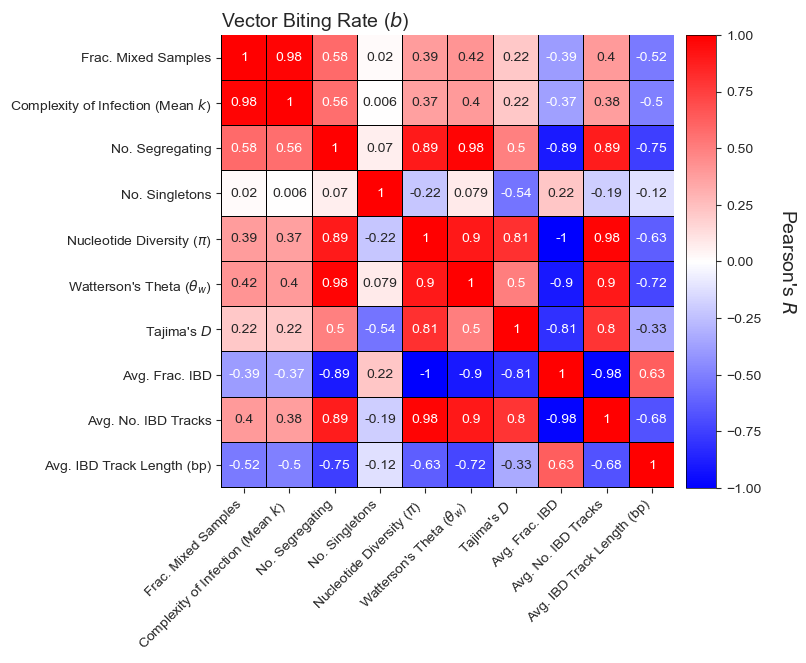

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

# Plot
sns.heatmap(br_corr, 
            square=True,
            annot=True,
            linewidths=0.01, # lines to separate cells
            linecolor='black',
            xticklabels=[genetic_names[g] for g in br_corr.columns],
            yticklabels=[genetic_names[g] for g in br_corr.index],
            cmap='bwr',
            vmin=-1,
            vmax=1,
            cbar_ax = fig.add_axes([ # this will scale the colorbar
                ax.get_position().x1 + 0.01, # left
                ax.get_position().y0, # bottom
                0.05, # width
                ax.get_position().y1 - 0.125, # top
            ]),
            ax=ax)

# Ticks
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), ha="right", rotation=45)
ax.set_title("Vector Biting Rate ($b$)", loc="left", fontsize=14)

# Color bar
cbar = ax.collections[0].colorbar 
cbar.ax.set_ylabel("Pearson's $R$", 
                   rotation=-90, fontsize=14,
                   labelpad=25) # move it a bit away from the axis
cbar.outline.set_linewidth(0.5) # modify some features of the outline
cbar.outline.set_edgecolor("black")

if savefig:
    fig.savefig("../figs/sec2_colinear-statistics-br.pdf", 
                bbox_inches="tight", 
                pad_inches=0.5)

### `gamma`

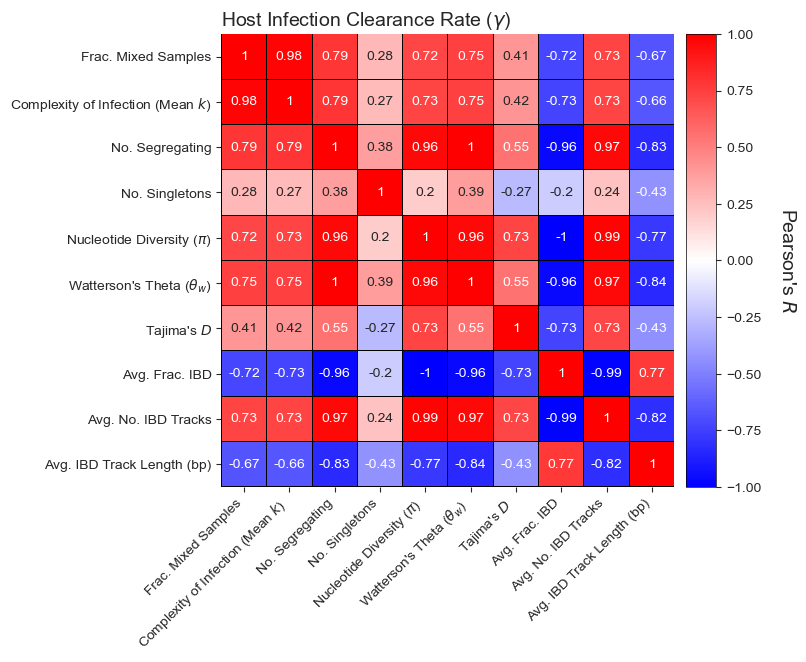

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

# Plot
sns.heatmap(gamma_corr, 
            square=True,
            annot=True,
            linewidths=0.01, # lines to separate cells
            linecolor='black',
            xticklabels=[genetic_names[g] for g in gamma_corr.columns],
            yticklabels=[genetic_names[g] for g in gamma_corr.index],
            cmap='bwr',
            vmin=-1,
            vmax=1,
            cbar_ax = fig.add_axes([ # this will scale the colorbar
                ax.get_position().x1 + 0.01, # left
                ax.get_position().y0, # bottom
                0.05, # width
                ax.get_position().y1 - 0.125, # top
            ]),
            ax=ax)

# Ticks
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), ha="right", rotation=45)
ax.set_title("Host Infection Clearance Rate ($\gamma$)", loc="left", fontsize=14)

# Color bar
cbar = ax.collections[0].colorbar 
cbar.ax.set_ylabel("Pearson's $R$", 
                   rotation=-90, fontsize=14,
                   labelpad=25) # move it a bit away from the axis
cbar.outline.set_linewidth(0.5) # modify some features of the outline
cbar.outline.set_edgecolor("black")

if savefig:
    fig.savefig("../figs/sec2_colinear-statistics-gamma.pdf", 
                bbox_inches="tight", 
                pad_inches=0.5)

### `nv`

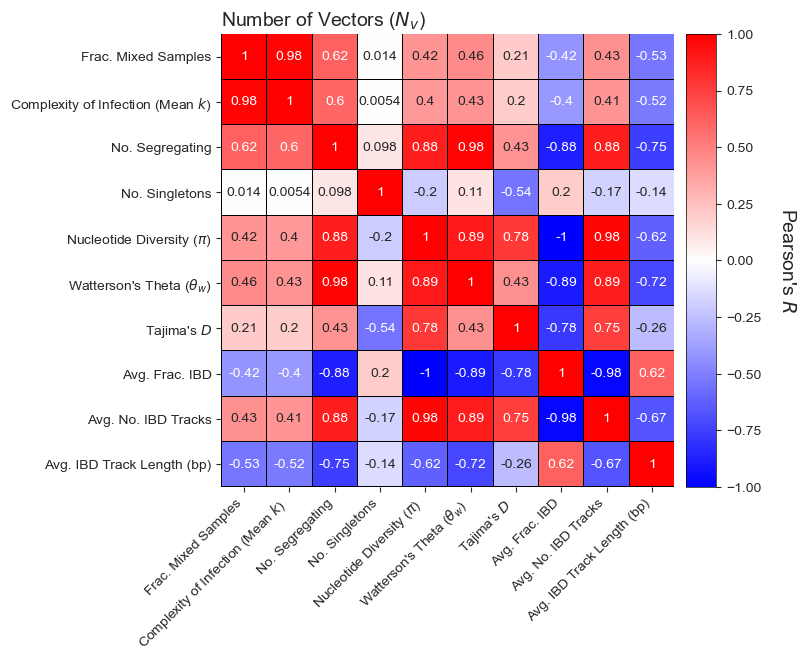

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

# Plot
sns.heatmap(nv_corr, 
            square=True,
            annot=True,
            linewidths=0.01, # lines to separate cells
            linecolor='black',
            xticklabels=[genetic_names[g] for g in nv_corr.columns],
            yticklabels=[genetic_names[g] for g in nv_corr.index],
            cmap='bwr',
            vmin=-1,
            vmax=1,
            cbar_ax = fig.add_axes([ # this will scale the colorbar
                ax.get_position().x1 + 0.01, # left
                ax.get_position().y0, # bottom
                0.05, # width
                ax.get_position().y1 - 0.125, # top
            ]),
            ax=ax)

# Ticks
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), ha="right", rotation=45)
ax.set_title("Number of Vectors ($N_v$)", loc="left", fontsize=14)

# Color bar
cbar = ax.collections[0].colorbar 
cbar.ax.set_ylabel("Pearson's $R$", 
                   rotation=-90, fontsize=14,
                   labelpad=25) # move it a bit away from the axis
cbar.outline.set_linewidth(0.5) # modify some features of the outline
cbar.outline.set_edgecolor("black")

if savefig:
    fig.savefig("../figs/sec2_colinear-statistics-nv.pdf", 
                bbox_inches="tight", 
                pad_inches=0.5)